In [1]:
import os
data_dir=os.path.join(os.getcwd(),'cell_images')
print("Dataset path:", data_dir)

Dataset path: C:\Users\prana\Documents\cell_images


In [2]:
import cv2 as cv
import numpy as np
categories=['Parasitized','Uninfected']
IMG_SIZE=64
data=[]
labels=[]
img=[]
for category in categories:
    path=os.path.join(data_dir,category)
    class_num=categories.index(category) #0-Parasitized 1-uninfected
    for img_name in os.listdir(path):
        try:
            img_path=os.path.join(path,img_name)
            img=cv.imread(img_path)
            img=cv.resize(img,(IMG_SIZE,IMG_SIZE))
            data.append(img)
            labels.append(class_num)
        except Exception as e:
            pass


In [3]:
X=np.array(data)/255.0
Y=np.array(labels)
print(X.shape,Y.shape)

(27317, 64, 64, 3) (27317,)


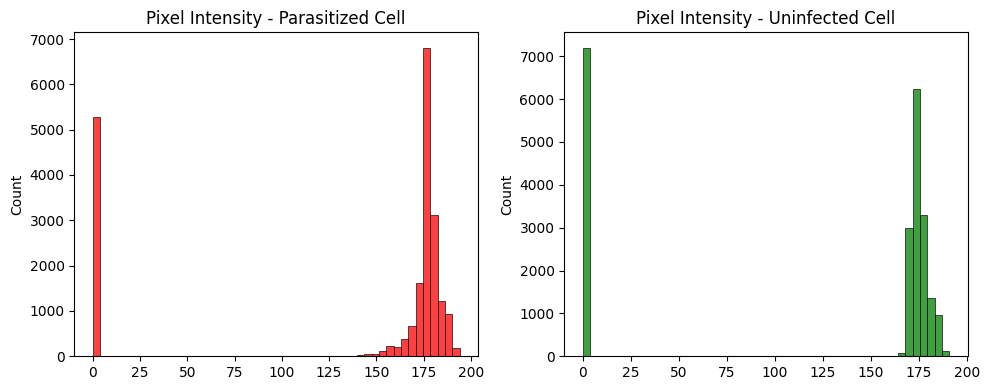

In [7]:
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sample_parasitized = cv2.imread(os.path.join(data_dir, "Parasitized", os.listdir(os.path.join(data_dir, "Parasitized"))[0]))
sample_uninfected = cv2.imread(os.path.join(data_dir, "Uninfected", os.listdir(os.path.join(data_dir, "Uninfected"))[0]))

sample_parasitized_gray = cv2.cvtColor(sample_parasitized, cv2.COLOR_BGR2GRAY)
sample_uninfected_gray = cv2.cvtColor(sample_uninfected, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(sample_parasitized_gray.ravel(), bins=50, color='red')
plt.title("Pixel Intensity - Parasitized Cell")

plt.subplot(1, 2, 2)
sns.histplot(sample_uninfected_gray.ravel(), bins=50, color='green')
plt.title("Pixel Intensity - Uninfected Cell")

plt.tight_layout()
plt.show()

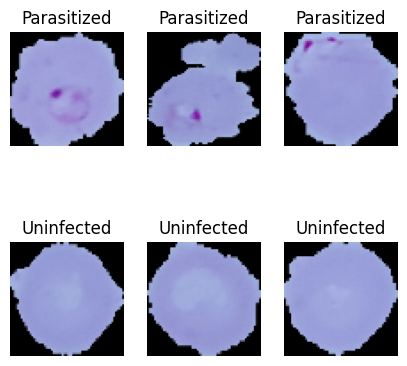

In [21]:
import random
plt.figure(figsize=(5, 5))
parasitized_indices=[i for i in range(len(Y)) if Y[i] == 0][:3]
uninfected_indices=[i for i in range(len(Y)) if Y[i] == 1][:3]
selected_indices=parasitized_indices + uninfected_indices
for i, idx in enumerate(selected_indices):
    plt.subplot(2,3,i+1)
    plt.imshow(X[idx])
    label="Parasitized" if Y[idx]== 0 else "Uninfected"
    plt.title(label)
    plt.axis("off")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Train:", x_train.shape, "Test:", x_test.shape)

Train: (21853, 64, 64, 3) Test: (5464, 64, 64, 3)


In [5]:
import tensorflow.keras.layers as k
input_shape=(IMG_SIZE,IMG_SIZE,3)
inp=k.Input(shape=input_shape)
#layer 1
conv1=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

#layer2
conv2=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

# Flatten
flat=k.Flatten()(drop2)

# Hidden layer 1
hidden1=k.Dense(512,activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)
# Hidden layer 2
hidden2=k.Dense(512,activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

#Output
out=k.Dense(1,activation="sigmoid")(drop4)

In [6]:
from tensorflow import keras
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,472,481 (17.06 MB)

 Trainable params: 4,470,305 (17.05 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [7]:
history=model.fit(np.array(x_train),y_train,batch_size=64,verbose=1,epochs=5,validation_split=0.1)

Epoch 1/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.7264 - loss: 0.5684 - val_accuracy: 0.5005 - val_loss: 3.5777
Epoch 2/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9038 - loss: 0.2494 - val_accuracy: 0.6532 - val_loss: 1.0951
Epoch 3/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9290 - loss: 0.1960 - val_accuracy: 0.9277 - val_loss: 0.2119
Epoch 4/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.9347 - loss: 0.1732 - val_accuracy: 0.9511 - val_loss: 0.1302
Epoch 5/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.9450 - loss: 0.1502 - val_accuracy: 0.9268 - val_loss: 0.1934


In [8]:
loss,acc=model.evaluate(x_test,y_test)
print("Accuracy-",acc*100)

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9303 - loss: 0.1855
Accuracy- 93.02708506584167


In [9]:
y_predict=model.predict(x_test)
y_predict=(y_predict>=0.5).astype("int32")

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [10]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
cm=confusion_matrix(y_predict,y_test)
print("Confusion-Matrix")
print(cm)
print("F1-score")
f1=f1_score(y_predict,y_test)
print(f1)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy*100)

Confusion-Matrix
[[2711  300]
 [  81 2372]]
F1-score
0.9256585365853659
Accuracy: 93.02708638360176
